<a href="https://colab.research.google.com/github/girilang/COMP9414-Tutorials/blob/main/Tutorial_Week_5_Simulated_Annealing_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Artificial Intelligence - COMP9414 23T2
###Tutorial week 5 - Metaheuritics - Part 1

Simulated annealing

@Author: __Francisco Cruz__



##Theoretical Background

Metaheuristics are algorithms designed to find approximate solutions for optimisation problems.
They are general-purpose techniques that can be applied to a wide range of problems where finding the optimal solution is computationally expensive or infeasible.

Metaheuristics are often inspired by natural or social phenomena and mimic processes such as evolution, swarm behaviour, or physical annealing.
They typically involve iterative improvement processes that gradually refine the candidate solution (or a population of candidate solutions) over multiple iterations.

Particularly, the simulated annealing algorithm is inspired by the annealing process in metallurgy.
The algorithm starts with an initial solution and iteratively explores the solution space by allowing moves to worse solutions based on the temperature parameter.
As the temperature decreases, the algorithm becomes more selective and focuses on exploiting the local search space.
The following algorithm shows the Simulated Annealing optimisation method.



Input($T_0, \alpha, N, T_f$)

$T \leftarrow T_0$

$S_{act} \leftarrow $ generate initial solution

While $T \geq T_f$

> For cont $\leftarrow 1$ TO $N(T)$

>> $S_{cond} \leftarrow $ Neighbour solution [from ($S_{act}$)]

>> $\delta \leftarrow f(S_{cond}) - f(S_{act})$

>> If rand(0,1) < $e^{-\delta/T}$ \OR $\delta < 0$

>>> $S_{act} \leftarrow S_{cond}$

>> EndIf

> EndFor

> $T \leftarrow \alpha(T)$

EndWhile

Return Best $S_{act}$ visited

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Section 2.a.__ Using Python, create the fitness function $y=x^2$. We will use this fitness function to evaluate the solutions.


In [2]:
#objective function definition
def fitness(x):
    return (x)**2.0

__Section 2.b.__ In a range of -10 to +10 plot the fitness function and show the optimal value.
At this point, consider the optimum a known value.


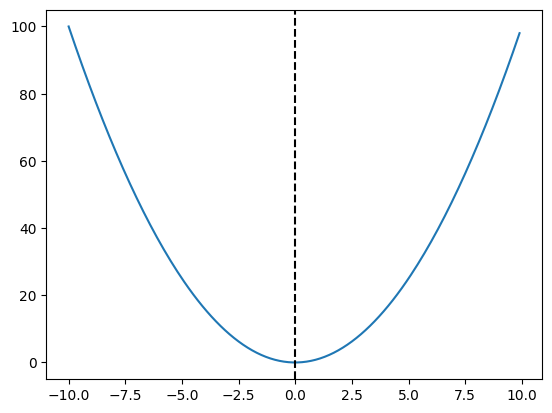

In [3]:
xMin, xMax = -10.0, 10.0
inputs = np.arange(xMin, xMax, 0.1)
results = fitness(inputs)
plt.plot(inputs, results)

#optimal value
xOptimal = 0.0
plt.axvline(x=xOptimal, ls='--', color='k')
plt.show()

__Section 2.c.__ Seed the random numbers with 999 using np.random.seed(999)

In [4]:
# This will be set together with the parameters

__Section 2.d.__ Implement the simulated annealing optimisation method shown in the previous algorithm as a function.

* For the initial solution, use a random number approximately between -10 and 10 from a standard normal distribution (i.e., $\mu=0, \sigma=1$).
* For the neighbour solution, use the current solution + a random number from a standard normal distribution.


In [5]:
def simulatedAnnealing(initialT, alpha, nIter, finalT):
    temp = initialT
    #generate initial solution
    currentSolution = np.random.randn() * 10
    bestSolution = currentSolution

    ###Uncomment for section 3.b
    #solutions = np.array([])
    #solutions = np.append(solutions, currentSolution)

    ###Uncomment for section 3.d
    #temperatures = np.array([])
    #temperatures = np.append(temperatures, initialT)

    while temp >= finalT:
        for i in range(nIter):
            neighbourSolution = currentSolution + np.random.randn()
            delta = fitness(neighbourSolution) - fitness(currentSolution)
            metropolis = np.exp(-delta / temp)
            if np.random.rand() < metropolis or delta < 0:
                currentSolution = neighbourSolution
                if fitness(currentSolution) < fitness(bestSolution):
                  bestSolution = currentSolution

        temp = alpha * temp

        ###Uncomment for sections 3.b and 3.d respectively
        #solutions = np.append(solutions, currentSolution)
        #temperatures = np.append(temperatures, temp)

    ###Uncomment for sections 3.b and 3.d respectively
    #return bestSolution, solutions, temperatures
    return bestSolution

__Section 3.a.__ Run the simulated annealing method using the following parameters: $T_0 = 1e+01, \alpha = 0.9, N = 100, T_f = 1e-05$. Print the returned solution and its fitness value.

In [6]:
#From section 2.c
np.random.seed(999)

initialT = 1e+01
alpha = 0.9
nIter = 100
finalT = 1e-05

best = simulatedAnnealing(initialT, alpha, nIter, finalT)
print('Returned solution: f(%s) = %f' % (best, fitness(best)))

Returned solution: f(0.00029014327281532207) = 0.000000


__Section 3.b.__ Modify the algorithm to store in an array the last current solution for each temperature cycle and return this array.

In [7]:
#From section 2.c
np.random.seed(999)

initialT = 1e+01
alpha = 0.9
nIter = 100
finalT = 1e-05

#Uncomment indicated lines in simulatedAnnealing function (and rerun)
best, solutions, temperatures = simulatedAnnealing(initialT, alpha, nIter, finalT)
print('Returned solution: f(%s) = %f' % (best, fitness(best)))

TypeError: cannot unpack non-iterable float object

__Section 3.c.__ Plot the solutions and the solution scores for each temperature cycle

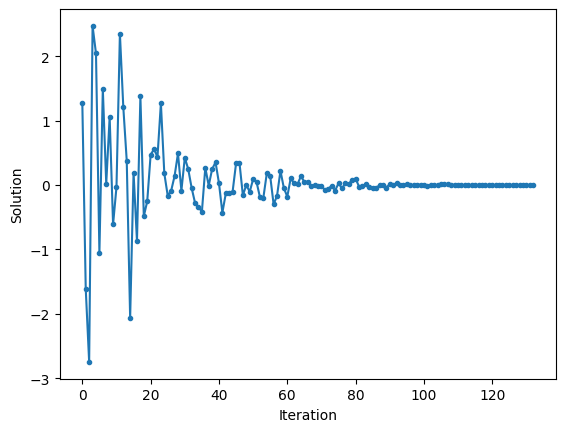

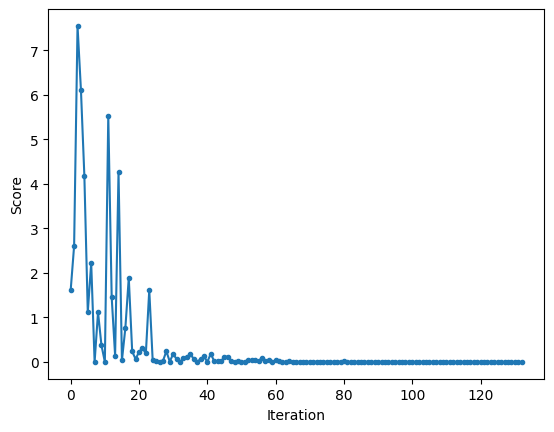

In [ ]:
#Plotting the solutions
plt.plot(solutions, ".-")
plt.xlabel("Iteration")
plt.ylabel("Solution")
plt.show()

#Plotting the scores
scores = fitness(solutions)
plt.plot(scores, ".-")
plt.xlabel("Iteration")
plt.ylabel("Score")
plt.show()


__Section 3.d.__ Similarly, store the temperatures used in an array, return it, and plot the temperature decrease.

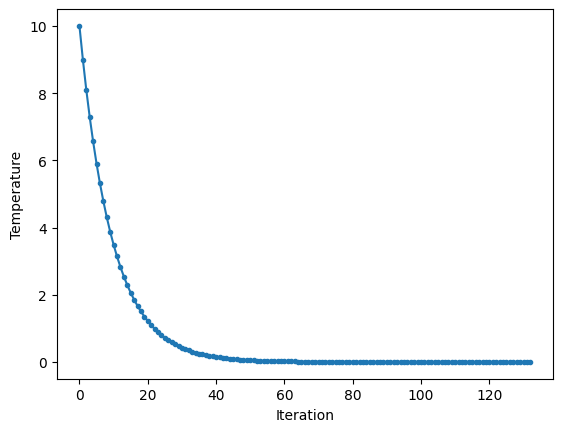

In [ ]:
plt.plot(temperatures, ".-")
plt.xlabel("Iteration")
plt.ylabel("Temperature")
plt.show()